In [1]:
import enzymeML_builder.EnzymeML_builder as EnzymeMLBuilder

columns = ["Column2", "Column3","Column4","Column5", "Column7", "Column8","Column9", "Column10" ]
concentrations = [0, 1,2,3, 4, 5, 6, 7]
columns = ["Column2", "Column3","Column4","Column5", "Column6","Column7", "Column8", "Column9" ]

for i, j in zip(columns, concentrations):

    data = EnzymeMLBuilder.EnzymeMLBuilder("j", i, j).build_measurements_list()

    x_values
0        0.0
1        1.5
2        3.0
3        4.5
4        6.0
5        7.5
6        9.0
7       10.5
8       12.0
9       13.5
10      15.0
11      16.5
12      18.0
13      19.5
14      21.0
15      22.5
16      24.0
17      25.5
18      27.0
19      28.5
20      30.0
21      31.5
22      33.0
23      34.5
24      36.0
25      37.5
26      39.0
27      40.5
28      42.0
29      43.5
    x_values                ref1                ref2                ref3  \
0        0.0  0.0440802853056135   0.041623235004254  0.0862241928169802   
1        1.5  0.0440949550314205  0.0420081302201819  0.0865703491080986   
2        3.0  0.0430180482648051  0.0410647406000629  0.0844930097219078   
3        4.5  0.0429101385627848   0.041284226140764  0.0847330675155204   
4        6.0  0.0448456057828888  0.0424317266444931  0.0867968896977074   
5        7.5  0.0447771859416923  0.0420742899327748  0.0859403989526222   
6        9.0  0.0436170686038113  0.0416136625755245  0.085015569

In [2]:
import pandas as pd

from submodule_copy import importer


df1 = None
df2 = None
df3 = None
df4 = None
df5 = None
df6 = None

dfs = [df1, df2, df3, df4, df5]

vars = locals()

vars["df11"] = "Hallo!!"


for i in concentrations:
  #path = 'A540nm/AlaricnoEnzml1mmolL.omex'
  path = 'A540nm/AlaricnoEnzml'+str(i)+'mmolL.omex'
  document = importer(path).build_data_frame()
  vars["df"+str(i)] = importer(path).build_data_frame()


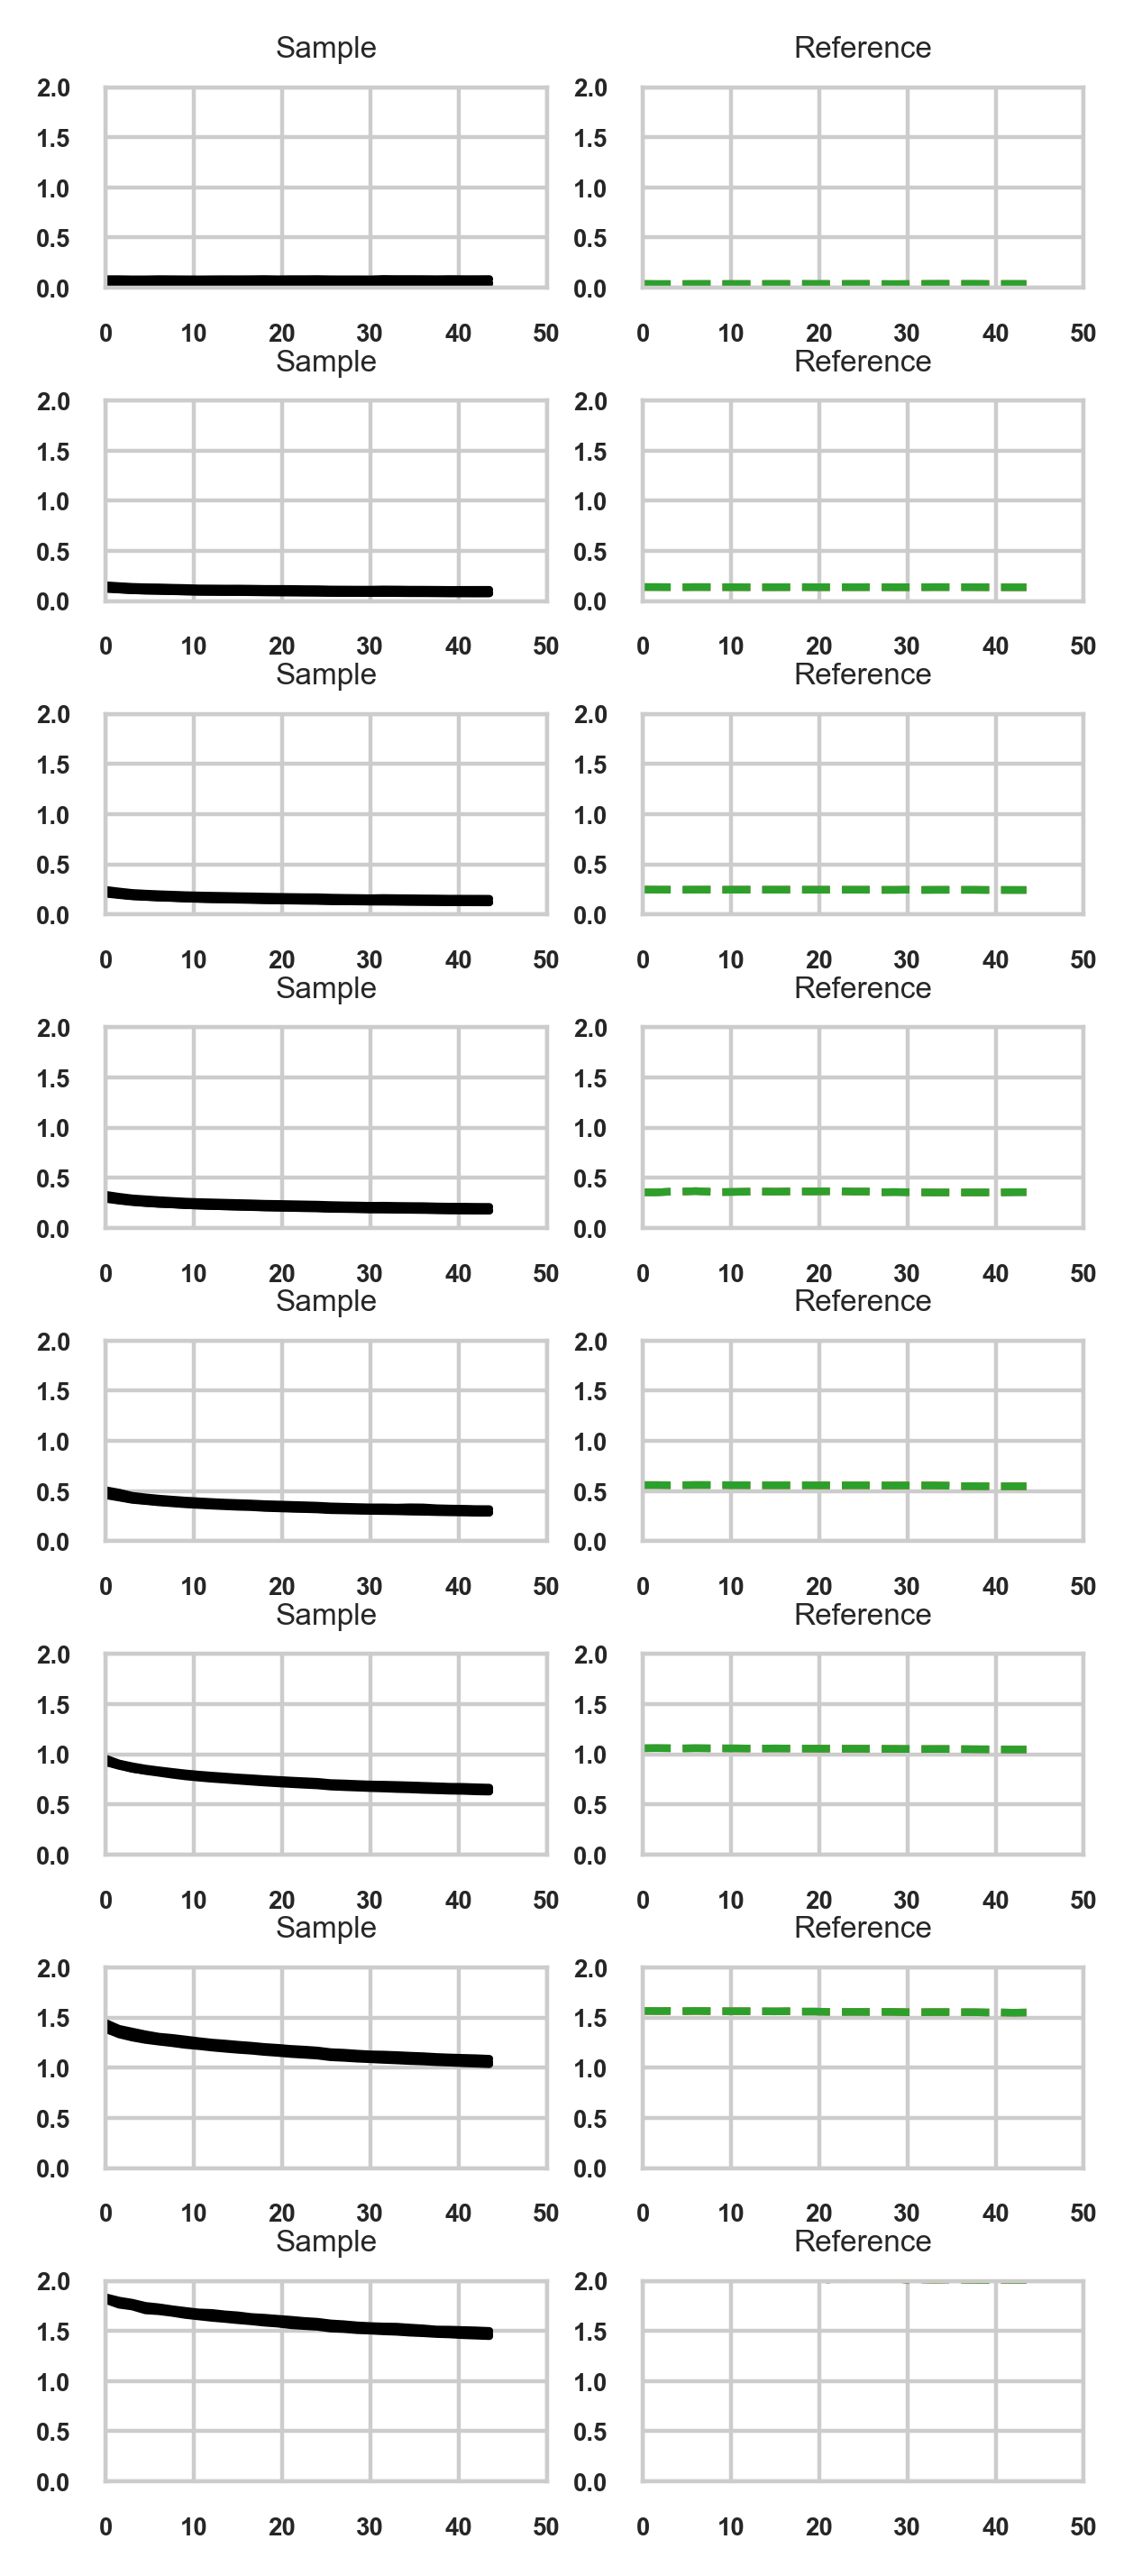

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}

plt.rc('font', **font)

plt.rcParams['figure.dpi'] =400 
sns.set_style("whitegrid")
fig, ax = plt.subplots(8, 2, figsize=(3,7))
for i in concentrations:

    #fig,ax=plt.subplots()

    conc = locals()["df"+str(concentrations.index(i))]
    index = concentrations.index(i)
    for j in range(3):
        x_values = pd.to_numeric(conc["x_values"])
        y_values = pd.to_numeric(conc["reference_"+str(j)])
        ax[index, 0].plot(x_values, y_values, color="black")
        
    
    for k in range(3):        
        x_values = pd.to_numeric(conc["x_values"])
        y_values = pd.to_numeric(conc["sample_"+str(j)])
        ax[index, 1].plot(x_values, y_values, linestyle="--")

    ax[index, 0].set_ylim(0,2)
    ax[index, 0].set_title("Sample")
    ax[index, 0].set_xlim(0,50)
    ax[index, 1].set_title("Reference")
    ax[index, 1].set_ylim([0,2])
    ax[index, 1].set_xlim(0,50)


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.1)
plt.savefig("plot.png", format="png")


In [4]:
## Modelling the data with PySCeS

from scipy import stats
import numpy as np

#data = locals()["df_1"]

#print(data)

slopes = []

for i in concentrations:
    print(i)
    conc = locals()["df"+str((concentrations.index(i)))]
    slope_1 = []
    for j in range(3):
        x_data = pd.to_numeric(conc["x_values"])
        y_data = pd.to_numeric(conc["reference_"+str(j)])
        slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_data[:15], y_data[:15])
        slope_1.append(slope)
    slopes.append(slope_1)

print(slopes)


slopes_mean = []

for i in slopes:
    slope_array = np.array(i)
    slopes_mean.append(np.mean(slope_array))

print(slopes_mean)





0
1
2
3
4
5
6
7
[[4.384049150327221e-05, 3.446894296963526e-05, 3.439964419944419e-05], [-0.0015429450138353148, -0.001563274782106766, -0.001524762152044586], [-0.0029862728117131454, -0.0028763526396100524, -0.0028602461028427615], [-0.0037042529865606954, -0.0040643806684520735, -0.003917341777936891], [-0.00581165151688449, -0.0057874207343692665, -0.006200432924191611], [-0.009026397699464953, -0.009621583782546333, -0.009219956008077937], [-0.009702631972684303, -0.010455283850328428, -0.01084337734871786], [-0.010254547736925405, -0.01083442899915776, -0.010031727067310073]]
[3.756969289078389e-05, -0.001543660649328889, -0.0029076238513886534, -0.0038953251443165533, -0.005933168391815122, -0.009289312496696407, -0.010333764390576865, -0.010373567934464414]


[3.756969289078389e-05, -0.001543660649328889, -0.0029076238513886534, -0.0038953251443165533, -0.005933168391815122, -0.009289312496696407, -0.010333764390576865, -0.010373567934464414]


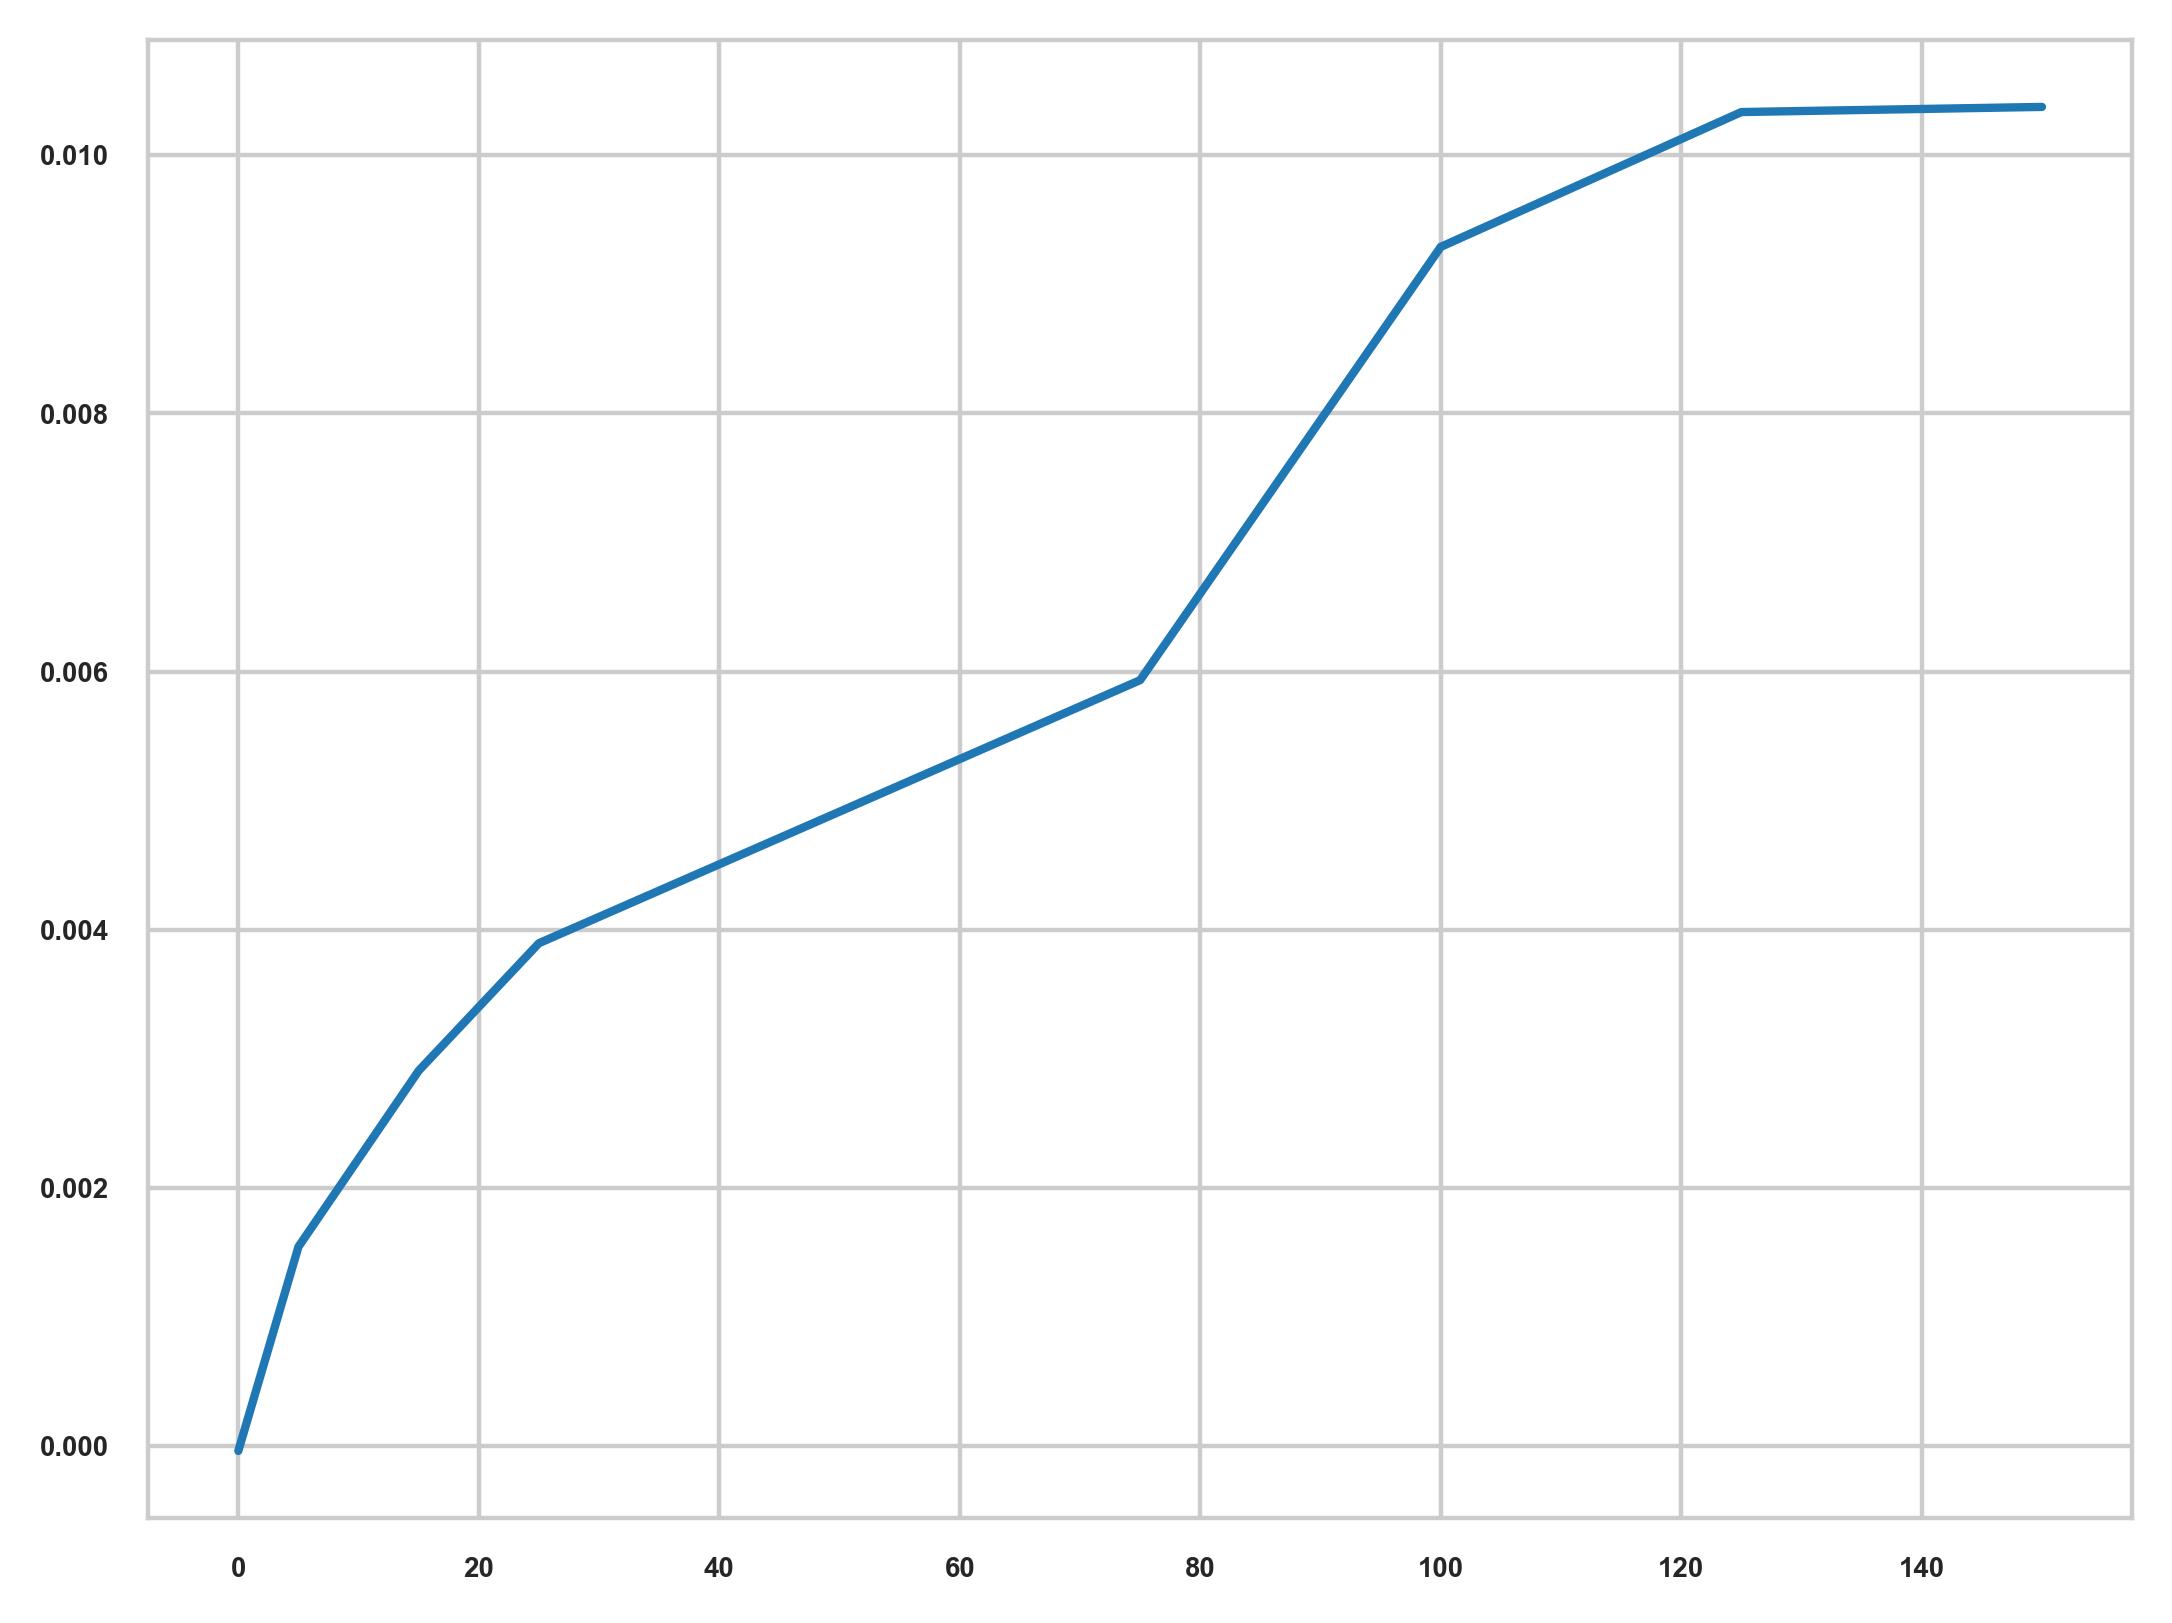

In [5]:
import matplotlib.pyplot as plt

dataframe = locals()["df1"] 
x_values = dataframe["x_values"]
#print(x_values)
concentrations = [0, 5,15,25, 75, 100, 125, 150]

slopes_array = np.array(slopes_mean)
print(slopes_mean)
slopes_positive = slopes_array*-1



plt.plot(concentrations, slopes_positive)

[-3.75696929e-05  1.54366065e-03  2.90762385e-03  3.89532514e-03
  5.93316839e-03  9.28931250e-03  1.03337644e-02  1.03735679e-02]
[[Model]]
    Model(mm)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 8
    # variables        = 2
    chi-square         = 4.1731e-06
    reduced chi-square = 6.9552e-07
    Akaike info crit   = -111.730293
    Bayesian info crit = -111.571410
    R-squared          = 0.96441408
[[Variables]]
    km:    93.5955533 +/- 40.4329494 (43.20%) (init = 2)
    vmax:  0.01700588 +/- 0.00351562 (20.67%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(km, vmax) = +0.9770
[0.         0.00086241 0.00234897 0.00358485 0.00756509 0.00878423
 0.00972451 0.01047179]


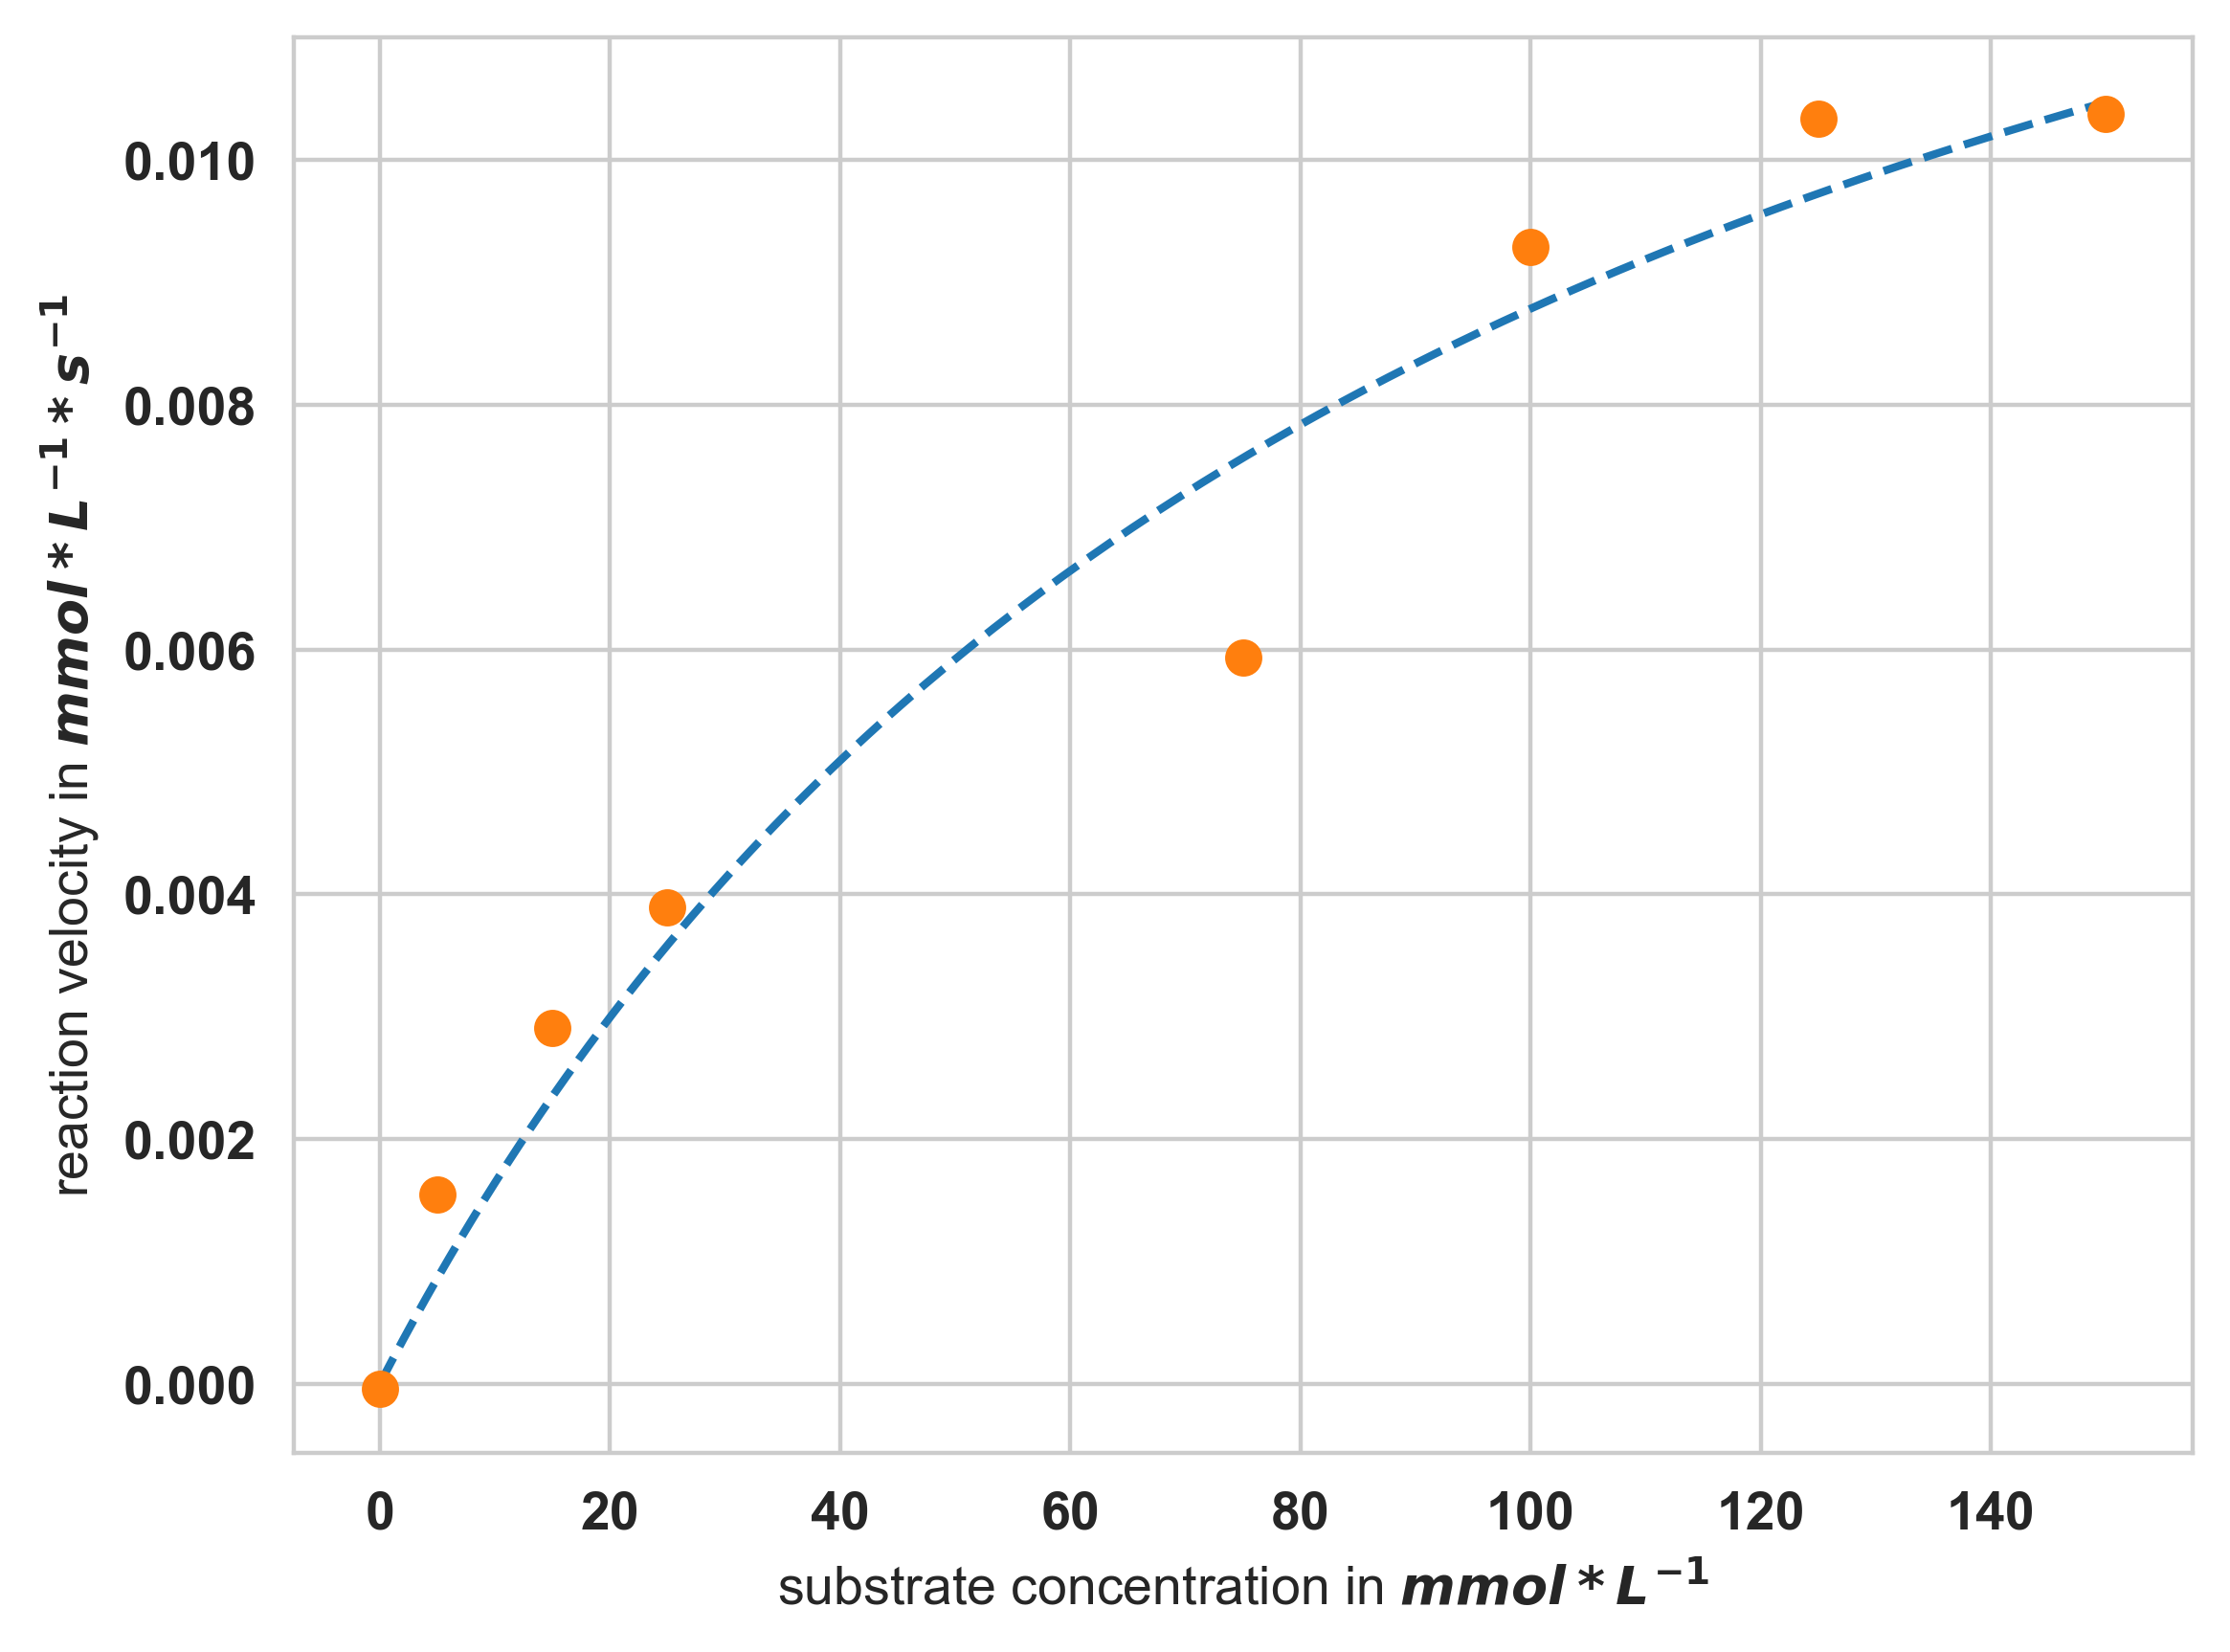

In [15]:
import lmfit

reaction_velocity = slopes_positive
print(reaction_velocity)
concentrations = np.array(concentrations)

def mm(s, km, vmax):
    v = vmax*s/(km+s)
    return v

model = lmfit.Model(mm)

params = lmfit.Parameters()
params.add('km', 2, min=0.000001, max=500)
params.add('vmax', 2, min=0.0000000001, max=100)

solution = model.fit(reaction_velocity,params=params,s=concentrations)

print(solution.fit_report())
print(solution.best_fit)
best_values = solution.best_values

def mm_sim(x, km, vmax):
    v = vmax*x/(km+x)
    return v



fitted_data = solution.best_fit

sim_x_data = np.linspace(0,150,num=150)
sim_v_data = []

for i in sim_x_data:
    value = mm_sim(i,best_values["km"], best_values["vmax"])
    sim_v_data.append(value)

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 10})

ax.plot(sim_x_data, sim_v_data, linestyle="--")
#ax.plot(concentrations, fitted_data, linestyle="--")
ax.plot(concentrations, reaction_velocity, linestyle="", marker="o")
ax.set_xlabel("substrate concentration in $mmol*L^{-1}$")
ax.set_ylabel("reaction velocity in $mmol*L^{-1}*s^{-1}$")

plt.savefig("plot.png", format="png")


In [7]:
import pandas as pd
import re
import numpy as np

with open('Thermo plate reader\ABTS_reaction.txt') as file:
    lines = file.readlines()
    #print(lines)

df = pd.read_csv(r'Thermo plate reader\ABTS_reaction.csv', delimiter=r';')
#print(df)

columns_deleted = df.drop(df.columns[0], axis=1)
#print(columns_deleted)

rows_deleted = df.drop(df.index[0:4])

#print(rows_deleted)


first_column = rows_deleted["Column2"]
#print(first_column)

#for i in first_column:
#    print(i)


na_deleted = first_column.dropna()

text = "Interation"

list= []

for i in na_deleted:
    test = re.search("^Iteration", i)
    if test:
        pass
    elif test==None:
        list.append(i)
    else:
#        except Exception as error:
            print("sorting error")
            raise

#print(6*30)

liste1 = list[0:180]

array = np.array(liste1)

reshaped = array.reshape((60, 3))

#print(reshaped)

array_sample = []
array_reference = []

for i in range(60):
    if i%2 == 0:
        array_sample.append(reshaped[i])
    else:
        array_reference.append(reshaped[i])


newarray = np.array(array_sample)
newarray_reference = np.array(array_reference)
df_test = pd.DataFrame(newarray, columns=['ref1', 'ref2', 'ref3'])
df_test1 = pd.DataFrame(newarray_reference, columns=['sample1', 'sample2', 'sample3'])

#print(df_test)
#print(df_test1)
print(len(df_test1))







30


In [8]:
x_values = []
for i in range(30):

    if len(x_values) == 0:
        x_values.append(0)
    elif len(x_values) != 0:
        last_value = x_values[i-1]
        x_values.append(last_value+1.5)

print(x_values)




[0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0, 13.5, 15.0, 16.5, 18.0, 19.5, 21.0, 22.5, 24.0, 25.5, 27.0, 28.5, 30.0, 31.5, 33.0, 34.5, 36.0, 37.5, 39.0, 40.5, 42.0, 43.5]
